In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dose_response_df = pd.read_csv('../data/v17.3_fitted_dose_response.csv', index_col='IC50_RESULTS_ID')

In [4]:
dose_response_df.head()

,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
IC50_RESULTS_ID,,,,,,,,,,,,
1,17.3,683665,MC-CAR,1,Erlotinib,EGFR,2.0,0.007812,2.453524,0.982610,0.021678,-0.015505
1482,17.3,684055,ES3,1,Erlotinib,EGFR,2.0,0.007812,3.376592,0.985169,0.029915,0.779999
1791,17.3,684057,ES5,1,Erlotinib,EGFR,2.0,0.007812,3.614664,0.983207,0.031201,0.985170
2177,17.3,684059,ES7,1,Erlotinib,EGFR,2.0,0.007812,3.223394,0.984574,0.093857,0.647971
2754,17.3,684062,EW-11,1,Erlotinib,EGFR,2.0,0.007812,2.486405,0.946034,0.087280,0.012832


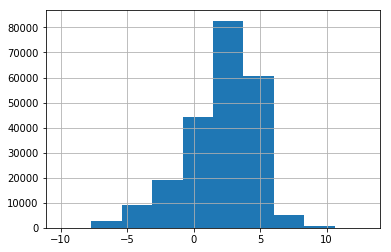

In [5]:
dose_response_df['LN_IC50'].hist()

In [6]:
print(len(dose_response_df['PUTATIVE_TARGET'].unique()))

202


In [7]:
# some value checks

print(len(dose_response_df['COSMIC_ID'].unique()))
print(len(dose_response_df['CELL_LINE_NAME'].unique()))
print(dose_response_df.count())

1065
1065
DATASET_VERSION        224202
COSMIC_ID              224202
CELL_LINE_NAME         224202
DRUG_ID                224202
DRUG_NAME              224202
PUTATIVE_TARGET        224202
MAX_CONC_MICROMOLAR    224202
MIN_CONC_MICROMOLAR    224202
LN_IC50                224202
AUC                    224202
RMSE                   224202
Z_SCORE                224202
dtype: int64


In [8]:
dose_response_df.describe()

,DATASET_VERSION,COSMIC_ID,DRUG_ID,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
count,2.242020e+05,2.242020e+05,224202.000000,224202.000000,224202.000000,224202.000000,224202.000000,224202.000000,2.242020e+05
mean,1.730000e+01,9.910390e+05,574.022685,51.136400,0.198738,2.108974,0.843302,0.078491,-4.326456e-10
std,6.778238e-11,2.206914e+05,468.873175,385.633652,1.506492,2.687759,0.194401,0.052955,9.994088e-01
min,1.730000e+01,6.836650e+05,1.000000,0.008000,0.000031,-9.991409,0.003390,0.001793,-9.561461e+00
25%,1.730000e+01,9.068050e+05,199.000000,2.560000,0.009766,0.662618,0.784594,0.035752,-6.407060e-01
50%,1.730000e+01,9.097200e+05,293.000000,10.000000,0.031250,2.545984,0.928997,0.064146,3.300400e-02
75%,1.730000e+01,1.240154e+06,1042.000000,10.240000,0.040000,4.032219,0.977479,0.108132,6.801902e-01
max,1.730000e+01,2.164691e+06,1530.000000,4000.000000,15.625000,12.900156,0.999946,0.299938,5.255236e+00


In [9]:
print(len(dose_response_df['CELL_LINE_NAME'].unique()))

1065


In [10]:
print(dose_response_df['CELL_LINE_NAME'].unique())

['MC-CAR' 'ES3' 'ES5' ... 'NCI-H1650' 'H2810' 'COR-L32']


In [11]:
dose_by_drug_df = dose_response_df.groupby(['DRUG_ID'])
dose_by_drug_df.head()

,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
IC50_RESULTS_ID,,,,,,,,,,,,
1,17.3,683665,MC-CAR,1,Erlotinib,EGFR,2.0000,0.007812,2.453524,0.982610,0.021678,-0.015505
1482,17.3,684055,ES3,1,Erlotinib,EGFR,2.0000,0.007812,3.376592,0.985169,0.029915,0.779999
1791,17.3,684057,ES5,1,Erlotinib,EGFR,2.0000,0.007812,3.614664,0.983207,0.031201,0.985170
2177,17.3,684059,ES7,1,Erlotinib,EGFR,2.0000,0.007812,3.223394,0.984574,0.093857,0.647971
2754,17.3,684062,EW-11,1,Erlotinib,EGFR,2.0000,0.007812,2.486405,0.946034,0.087280,0.012832
2,17.3,683665,MC-CAR,3,Rapamycin,MTORC1,0.1000,0.000391,-0.605979,0.981316,0.031644,0.824852
1483,17.3,684055,ES3,3,Rapamycin,MTORC1,0.1000,0.000391,0.121827,0.981284,0.073895,1.172477
1792,17.3,684057,ES5,3,Rapamycin,MTORC1,0.1000,0.000391,0.610943,0.983097,0.032647,1.406095
2178,17.3,684059,ES7,3,Rapamycin,MTORC1,0.1000,0.000391,0.008208,0.981110,0.065864,1.118209


In [12]:
dose_response_df.sort_values('COSMIC_ID').head(100)

,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
IC50_RESULTS_ID,,,,,,,,,,,,
1,17.3,683665,MC-CAR,1,Erlotinib,EGFR,2.0000,0.007812,2.453524,0.982610,0.021678,-0.015505
228,17.3,683665,MC-CAR,1143,HG-5-88-01,"EGFR, ADCK4",10.0000,0.039062,3.401213,0.964035,0.095435,0.114689
229,17.3,683665,MC-CAR,1149,TW 37,"BCL2, BCL-XL, MCL1",5.0000,0.019531,-1.782843,0.396771,0.064549,-1.021536
59,17.3,683665,MC-CAR,164,JQ12,"HDAC1, HDAC2",5.1200,0.020000,-0.081223,0.674044,0.050431,-0.796175
230,17.3,683665,MC-CAR,1158,XMD11-85h,"BRSK2, FLT4, MARK4, PRKCD, RET, SPRK1",10.0000,0.039062,2.431612,0.906672,0.071607,-1.520882
58,17.3,683665,MC-CAR,163,JQ1,"BRD2, BRD3, BRD4, BRDT",2.5600,0.010000,-0.846454,0.662614,0.072581,-0.715919
231,17.3,683665,MC-CAR,1161,ZG-10,JNK1,10.0000,0.039062,0.314144,0.630115,0.173852,-0.979763
232,17.3,683665,MC-CAR,1164,XMD8-92,MAPK7,10.0000,0.039062,1.772578,0.840464,0.039075,-1.284605
57,17.3,683665,MC-CAR,159,HG6-64-1,BRAF,5.1200,0.020000,0.513466,0.763621,0.041911,-0.310852


In [13]:
mc_car_cell_line_df = dose_response_df[dose_response_df['CELL_LINE_NAME'] == 'BHY']

In [15]:
print(mc_car_cell_line_df.count())
mc_car_cell_line_df.sort_values('DRUG_ID').head(300)

DATASET_VERSION        193
COSMIC_ID              193
CELL_LINE_NAME         193
DRUG_ID                193
DRUG_NAME              193
PUTATIVE_TARGET        193
MAX_CONC_MICROMOLAR    193
MIN_CONC_MICROMOLAR    193
LN_IC50                193
AUC                    193
RMSE                   193
Z_SCORE                193
dtype: int64


,DATASET_VERSION,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
IC50_RESULTS_ID,,,,,,,,,,,,
52497,17.3,753535,BHY,133,Doxorubicin,Anthracycline,1.024,0.004000,-3.460530,0.387838,0.089187,-1.036646
52498,17.3,753535,BHY,134,Etoposide,TOP2,16.000,0.062500,0.500860,0.579320,0.038982,-0.553541
52499,17.3,753535,BHY,135,Gemcitabine,Pyrimidine antimetabolite,1.024,0.004000,-4.969998,0.180305,0.097458,-0.993080
52500,17.3,753535,BHY,136,Mitomycin-C,DNA crosslinker,16.000,0.062500,-2.727565,0.128401,0.076244,-1.256444
52501,17.3,753535,BHY,140,Vinorelbine,Microtubule destabiliser,0.064,0.000250,-4.539676,0.653388,0.079158,-0.458395
52502,17.3,753535,BHY,147,NSC-87877,"SHP-1 (PTPN6), SHP-2 (PTPN11)",16.000,0.062500,5.347997,0.986812,0.048125,0.468620
52503,17.3,753535,BHY,150,Bicalutamide,AR,1.024,0.004000,2.336088,0.983028,0.063242,-0.475625
52504,17.3,753535,BHY,151,QS11,ARFGAP1,10.240,0.040000,1.687381,0.809642,0.090899,-1.143662
52505,17.3,753535,BHY,152,CP466722,ATM,16.000,0.062500,2.115067,0.807464,0.038236,-0.368783


In [ ]:
#pathway_ds = sns.load_dataset(drug_df)
#pathway = pathway_ds.pop("TARGET_PATHWAY")

sns.clustermap(drug_df)

